In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
import mne
import random
from sklearn.metrics import classification_report
from numpy import zeros, newaxis
from scipy import signal

In [2]:
MDD_dataset_Filenames = ['MDD S1 EC.edf', 'MDD S2  EC.edf', 'MDD S3 EC.edf']
H_dataset_Filenames = ['H S1 EC.edf', 'H S2 EC.edf']

MDD_dataset_list = []
H_dataset_list = []

for filename in MDD_dataset_Filenames:
    data = mne.io.read_raw_edf('./full_dataset/MDD/EC/' + str(filename))
    MDD_dataset_list.append(data)  
    
for filename in H_dataset_Filenames:
    data = mne.io.read_raw_edf('./full_dataset/H/EC/' + str(filename))
    H_dataset_list.append(data)  

Extracting EDF parameters from c:\python\MDD\full_dataset\MDD\EC\MDD S1 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\python\MDD\full_dataset\MDD\EC\MDD S2  EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\python\MDD\full_dataset\MDD\EC\MDD S3 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\python\MDD\full_dataset\H\EC\H S1 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\python\MDD\full_dataset\H\EC\H S2 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
MDD_dataset_list[0].ch_names

['EEG Fp1-LE',
 'EEG F3-LE',
 'EEG C3-LE',
 'EEG P3-LE',
 'EEG O1-LE',
 'EEG F7-LE',
 'EEG T3-LE',
 'EEG T5-LE',
 'EEG Fz-LE',
 'EEG Fp2-LE',
 'EEG F4-LE',
 'EEG C4-LE',
 'EEG P4-LE',
 'EEG O2-LE',
 'EEG F8-LE',
 'EEG T4-LE',
 'EEG T6-LE',
 'EEG Cz-LE',
 'EEG Pz-LE',
 'EEG A2-A1']

In [4]:
MDD_dataframe = [] #MDD 환자의 데이터프레임 리스트
H_dataframe = [] #건강한 사람의 데이터프레임 리스트
y = []
for raw in MDD_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(T_data, columns = channels, index = time)
    MDD_dataframe.append(temp[['EEG Fp1-LE', 'EEG F3-LE', 'EEG F7-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG F8-LE']])
    y.append(1)
    
for raw in H_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(T_data, columns = channels, index = time)
    H_dataframe.append(temp[['EEG Fp1-LE', 'EEG F3-LE', 'EEG F7-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG F8-LE']])
    y.append(0)

In [5]:
for df in MDD_dataframe:
    col = list(df.columns)
    for c in col:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-5-4f91bce91e5c>, line 4)

In [35]:
f,t,z = scipy.signal.stft(MDD_dataframe[1]['EEG Fp1-LE'])

In [36]:
f, t, z

(array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
        0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
        0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
        0.05859375, 0.0625    , 0.06640625, 0.0703125 , 0.07421875,
        0.078125  , 0.08203125, 0.0859375 , 0.08984375, 0.09375   ,
        0.09765625, 0.1015625 , 0.10546875, 0.109375  , 0.11328125,
        0.1171875 , 0.12109375, 0.125     , 0.12890625, 0.1328125 ,
        0.13671875, 0.140625  , 0.14453125, 0.1484375 , 0.15234375,
        0.15625   , 0.16015625, 0.1640625 , 0.16796875, 0.171875  ,
        0.17578125, 0.1796875 , 0.18359375, 0.1875    , 0.19140625,
        0.1953125 , 0.19921875, 0.203125  , 0.20703125, 0.2109375 ,
        0.21484375, 0.21875   , 0.22265625, 0.2265625 , 0.23046875,
        0.234375  , 0.23828125, 0.2421875 , 0.24609375, 0.25      ,
        0.25390625, 0.2578125 , 0.26171875, 0.265625  , 0.26953125,
        0.2734375 , 0.27734375, 0.28125   , 0.28

In [37]:
b[:,:75000]

NameError: name 'b' is not defined

(0.0, 0.1)

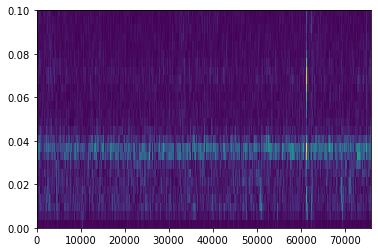

In [41]:
plt.pcolormesh(t, f, np.abs(z))
plt.ylim(0,0.1)

In [ ]:
all_df = np.array(MDD_dataframe[0].T)[newaxis,:,:45000]

for i in range(1, len(MDD_dataframe)):
    b = np.array(MDD_dataframe[i].T)
    print(b.shape)
    print(all_df.shape)
    all_df = np.vstack([all_df, b[newaxis,:,:45000]])
    

all_df.shape